In [ ]:
import pandas as pd
url = "https://datosabiertos.gob.pe/sites/default/files/Datos_abiertos_admision_2021_1_2024_1.csv"
df = pd.read_csv(url)
print(df.head())

                                              IDHASH  \
0  E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...   
1  2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...   
2  3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...   
3  FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...   
4  E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...   

                      COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
0       LA DIVINA PROVIDENCIA         LIMA         LIMA   
1           86019 LA LIBERTAD       ÁNCASH       HUARAZ   
2  0113 DANIEL ALOMIAS ROBLES         LIMA         LIMA   
3     SEBASTIAN SALAZAR BONDY         LIMA         LIMA   
4           TRILCE LOS OLIVOS         LIMA         LIMA   

             COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
0               SURQUILLO         PERÚ                 2020   
1                  HUARAZ         PERÚ                 2017   
2  SAN JUAN DE LURIGANCHO         PERÚ                 2016   
3             SANTA ANITA         PERÚ                 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(url)

NameError: name 'pd' is not defined

In [ ]:
ZONAS_LIMA = {
    'LIMA NORTE': [
        'COMAS', 'INDEPENDENCIA', 'LOS OLIVOS', 'PUENTE PIEDRA',
        'SAN MARTIN DE PORRES', 'ANCON', 'CARABAYLLO', 'SANTA ROSA'
    ],
    'LIMA SUR': [
        'CHORRILLOS', 'VILLA MARIA DEL TRIUNFO', 'VILLA EL SALVADOR',
        'SAN JUAN DE MIRAFLORES', 'LURIN', 'PACHACAMAC', 'PUCUSANA',
        'PUNTA HERMOSA', 'PUNTA NEGRA', 'SAN BARTOLO', 'SANTA MARIA DEL MAR'
    ],
    'LIMA ESTE': [
        'ATE', 'CHACLACAYO', 'EL AGUSTINO', 'LA MOLINA',
        'SAN JUAN DE LURIGANCHO', 'SANTA ANITA', 'LURIGANCHO', 'CIENEGUILLA'
    ],
    'LIMA CENTRO': [
        'CERCADO DE LIMA', 'JESUS MARIA', 'LA VICTORIA', 'LINCE',
        'MAGDALENA DEL MAR', 'PUEBLO LIBRE', 'SAN BORJA', 'SAN ISIDRO',
        'SAN LUIS', 'SANTIAGO DE SURCO', 'SURQUILLO', 'BRENA',
        'MIRAFLORES', 'BARRANCO', 'RIMAC'
    ],
    'CALLAO': [
        'CALLAO', 'BELLAVISTA', 'CARMEN DE LA LEGUA REYNOSO',
        'LA PERLA', 'LA PUNTA', 'VENTANILLA', 'MI PERU'
    ]
}

In [ ]:
# Función para clasificar el distrito en su zona
def clasificar_zona(distrito):
    for zona, lista_distritos in ZONAS_LIMA.items():
        if distrito in lista_distritos:
            return zona
    return 'OTROS'  # Para distritos fuera de Lima o errores de escritura

In [ ]:
df['ZONAS DE LIMA'] = df['DOMICILIO_DIST'].apply(clasificar_zona)

In [ ]:
df['ZONAS DE LIMA'].value_counts()

,count
ZONAS DE LIMA,
OTROS,15332
LIMA NORTE,10386
LIMA ESTE,7820
LIMA SUR,4090
LIMA CENTRO,2809
CALLAO,2079


In [ ]:
ADMITIDOS_POR_ZONA = df[df['INGRESO']=='SI']['ZONAS DE LIMA'].value_counts()
NO_ADMITIDOS_POR_ZONA = df[df['INGRESO']=='NO']['ZONAS DE LIMA'].value_counts()

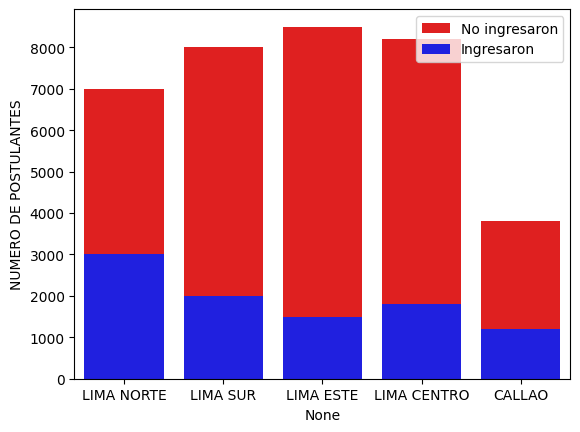

In [ ]:
sns.barplot(x=NO_ADMITIDOS_POR_ZONA.index, y=NO_ADMITIDOS_POR_ZONA.values , label = 'No ingresaron', color='red')
sns.barplot(x=ADMITIDOS_POR_ZONA.index, y=ADMITIDOS_POR_ZONA.values , label = 'Ingresaron', color='blue')
plt.ylabel('NUMERO DE POSTULANTES')
plt.show()

In [ ]:
ADMITIDOS_POR_ZONA = df[df['INGRESO']=='SI']['ZONAS DE LIMA'].value_counts()
NO_ADMITIDOS_POR_ZONA = df[df['INGRESO']=='NO']['ZONAS DE LIMA'].value_counts()

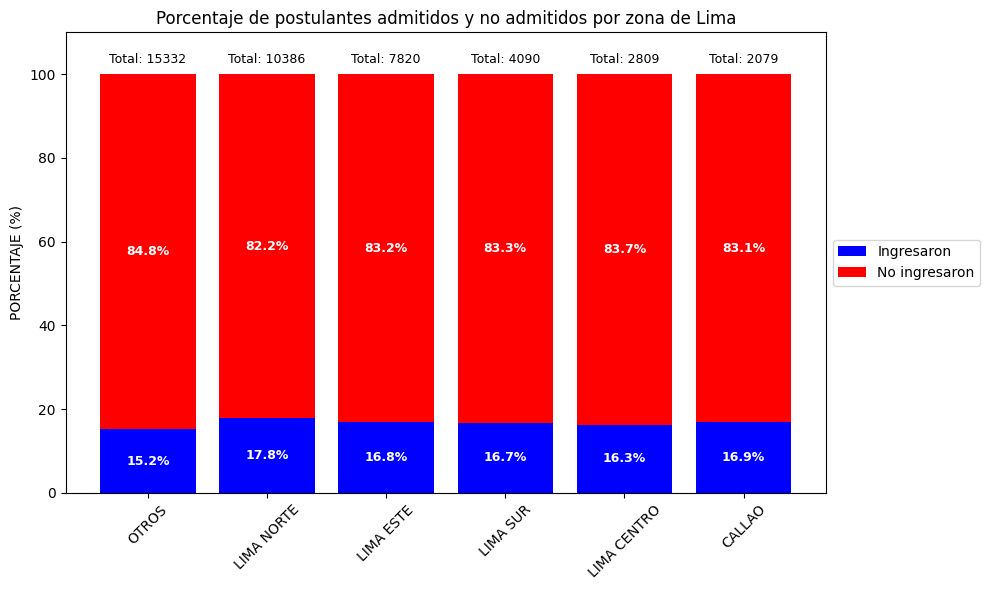

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_zonas = pd.DataFrame({
    'Ingresaron': ADMITIDOS_POR_ZONA,
    'No ingresaron': NO_ADMITIDOS_POR_ZONA
}).fillna(0)

df_zonas['Total'] = df_zonas['Ingresaron'] + df_zonas['No ingresaron']
df_zonas['% Ingresaron'] = df_zonas['Ingresaron'] / df_zonas['Total'] * 100
df_zonas['% No ingresaron'] = df_zonas['No ingresaron'] / df_zonas['Total'] * 100

plt.figure(figsize=(10, 6))
plt.bar(df_zonas.index, df_zonas['% Ingresaron'], label='Ingresaron', color='blue')
plt.bar(df_zonas.index, df_zonas['% No ingresaron'], bottom=df_zonas['% Ingresaron'], label='No ingresaron', color='red')

for i, zona in enumerate(df_zonas.index):
    pct_ing = df_zonas.loc[zona, '% Ingresaron']
    pct_no = df_zonas.loc[zona, '% No ingresaron']
    total = int(df_zonas.loc[zona, 'Total'])

    plt.text(i, pct_ing / 2, f"{pct_ing:.1f}%", ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    plt.text(i, pct_ing + pct_no / 2, f"{pct_no:.1f}%", ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    plt.text(i, 102, f"Total: {total}", ha='center', va='bottom', color='black', fontsize=9)

plt.ylabel('PORCENTAJE (%)')
plt.title('Porcentaje de postulantes admitidos y no admitidos por zona de Lima')
plt.xticks(rotation=45)
plt.ylim(0, 110)

# Mover leyenda fuera del gráfico a la derecha
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [ ]:
zona_counts = df['ZONAS DE LIMA'].value_counts()
zona_percent = zona_counts / zona_counts.sum() * 100

/tmp/ipython-input-1673442643.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zona_df, x='ZONAS DE LIMA', y='PORCENTAJE', palette='viridis')


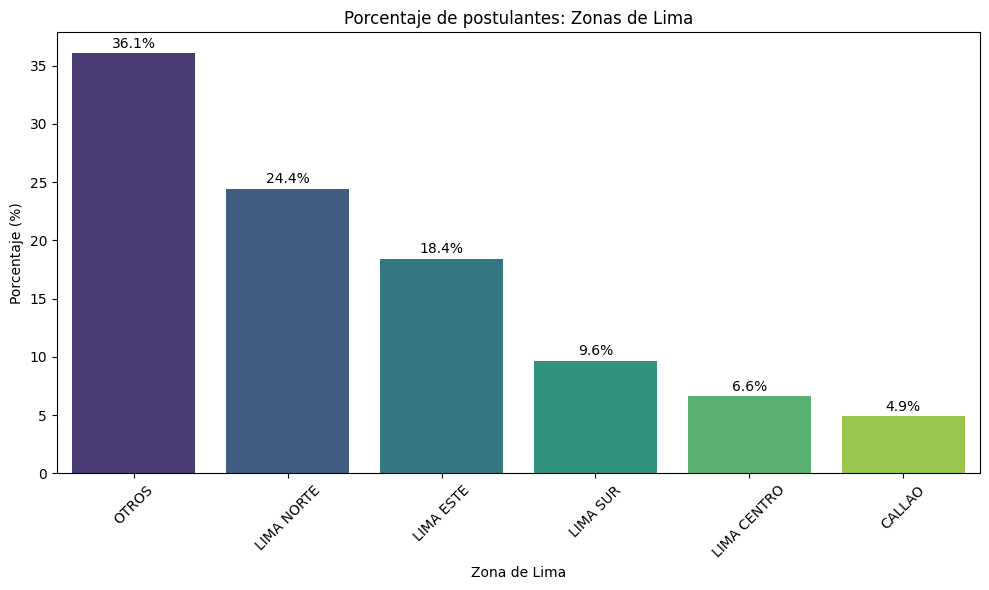

In [ ]:
# Preparar DataFrame para graficar
zona_df = zona_percent.reset_index()
zona_df.columns = ['ZONAS DE LIMA', 'PORCENTAJE']

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=zona_df, x='ZONAS DE LIMA', y='PORCENTAJE', palette='viridis')

# Añadir etiquetas encima de cada barra
for index, row in zona_df.iterrows():
    plt.text(index, row['PORCENTAJE'] + 0.5, f"{row['PORCENTAJE']:.1f}%", ha='center')

plt.title('Porcentaje de postulantes: Zonas de Lima')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Zona de Lima')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()